# Homework – Spectral Analysis 
## IEOR 135/290, Data-X: Applied Data Ventures
Author: Sudarshan Gopalakrishnan (in collaboration with Ikhlaq Sidhu)

UC Berkeley, B.S. EECS'21

Email: sudarshan.gopal@berkeley.edu



## Objective

In this homework, we will explore using spectral analysis to build a timeseries forecasting of the number of single family homes purchased in the United States. The dataset is sourced from the Federal Reserve of St. Louis, and contains information about the number of single family homes purchased from 1963 to 2020.

### Setting Up Imports and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import librosa

%matplotlib inline

sns.set(rc={'figure.figsize':(14,6)})


Bad key "text.dvipnghack" on line 127 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
/Users/sudarshan/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "an

In [2]:
samples, sampling_rate = librosa.load("audio.wav", sr=None, mono=True, offset=0.0, duration=None)

len(samples), sampling_rate

(408226, 8000)

### Your Audio File

Text(0, 0.5, 'Normalized Aplitude')

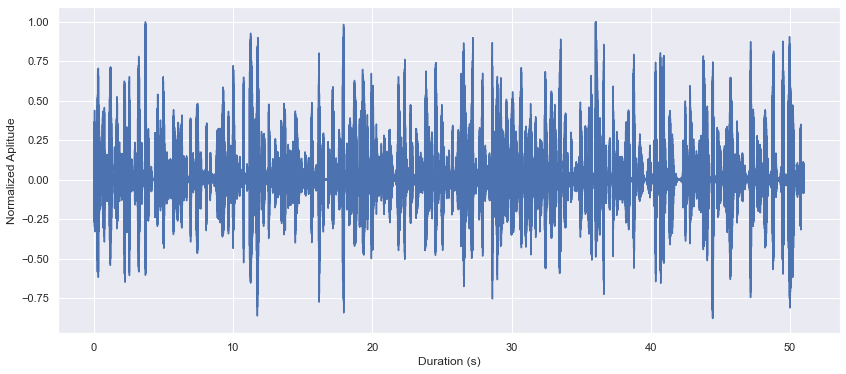

In [3]:
plt.plot(np.linspace(start=0, stop=len(samples)/sampling_rate, num=len(samples)), samples)
plt.xlabel("Duration (s)")
plt.ylabel("Normalized Aplitude")


### Question 1
Compute the fourier transformation of the HSN1F Value in the dataset, and store it in fft_hsn1f.

In [ ]:
freq = np.fft.fftfreq(len(samples), 1/sampling_rate)
fft_x = np.fft.fft(samples)
fft_x[:10]

-------------------
As expected, you notice a real and an imaginary component in the above array. The plot below shows fft_hsn1f plotted vs samples


**Plot:** Fourier Transformation of HSN1F vs. Sample Count

In [ ]:
plt.plot(abs(fft_x))

### Question 2
What do you notice about this signal?

In [ ]:
# Use this space to manipulate the signal for your analysis

*Your answer here*

### Question 3

**Question 3a: Shifting**

Use the Swap Half Spaces technique to process the FFT signal. Generate plots and discuss your conclusions.

In [ ]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(freq)

In [ ]:
# Write your code here to generate plots
plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frequency (Hz)")

*Discuss your conclusions here*

**Question 3b: Folding**

Use the Fold Negative Frequencies technique to process the FFT Signal 

In [ ]:
half_n = int(np.ceil(len(samples)/2.0))
fft_x_half = (2.0 / len(samples)) * fft_x[:half_n]
freq_half = freq[:half_n]

In [ ]:
# Write your code here to generate plots; Optional: Consider logging the signal to see better visualize the signal
plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

*Discuss your conclusions here*

# Question 4 Spectograms
Visual representation of frequencies of a given signal with time is called Spectrogram. In a spectrogram representation plot — one axis represents the time, the second axis represents frequencies and the colors represent magnitude (amplitude) of the observed frequency at a particular time. The following screenshot represents the spectrogram of the same audio signal we discussed earlier. Bright colors represent strong frequencies. Similar to earlier FFT plot, smaller frequencies ranging from (0–1kHz) are strong(bright).